In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Crop_Production.csv')
dataset.head(-10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246076,West Bengal,PURULIA,2014,Rabi,Linseed,160.0,51.0
246077,West Bengal,PURULIA,2014,Rabi,Masoor,31.0,19.0
246078,West Bengal,PURULIA,2014,Rabi,Moong(Green Gram),64.0,40.0
246079,West Bengal,PURULIA,2014,Rabi,Peas & beans (Pulses),12.0,12.0


In [3]:
dataset.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


# EDA on Crop Production Data

Which crop is the most common choice for agriculture in India ?

In [4]:
dataset["Crop"].value_counts().head()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Name: Crop, dtype: int64

Rice is the most popular choice followed by MAize and Moong

### Total production of crops statewise

In [5]:
dataset.sort_values("Production", ascending = False).head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
178273,Tamil Nadu,COIMBATORE,2011,Whole Year,Coconut,82704.0,1.250800e+09
178331,Tamil Nadu,COIMBATORE,2013,Whole Year,Coconut,84531.0,1.212000e+09
100654,Kerala,MALAPPURAM,2012,Whole Year,Coconut,102417.0,1.125000e+09
100612,Kerala,MALAPPURAM,2009,Whole Year,Coconut,108380.0,1.063000e+09
100149,Kerala,KOZHIKODE,1999,Whole Year,Coconut,131061.0,1.059000e+09


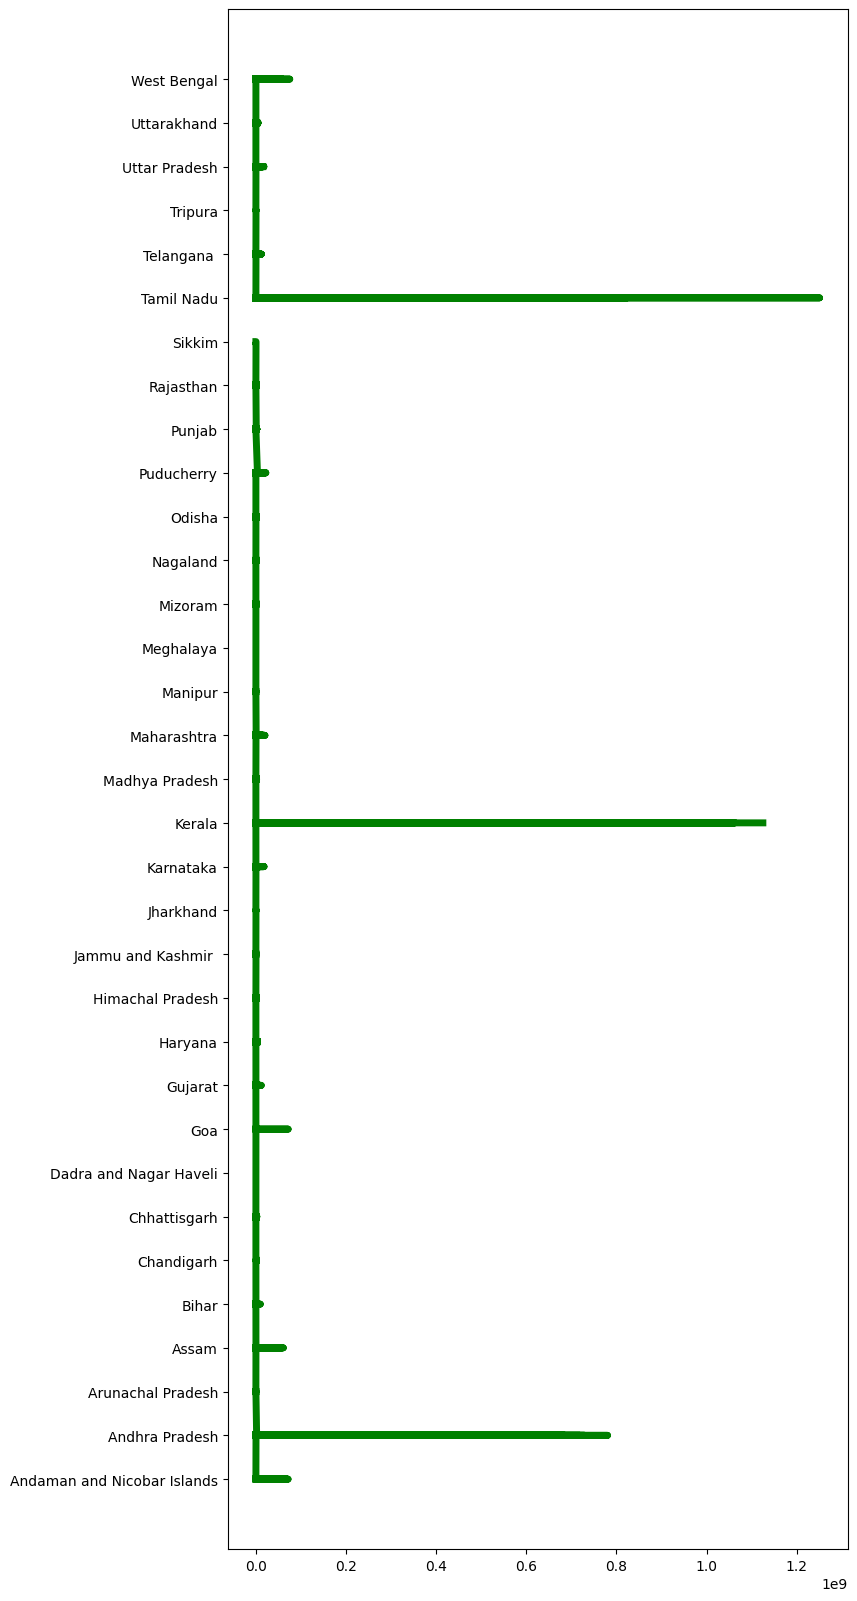

In [6]:
plt.figure(figsize=(8,20))

plt.plot(dataset.Production, dataset.State_Name, color='green', linewidth=5)

plt.show()

Tamil Nadu has the highest production

### Which state is producing more crops?

<Axes: >

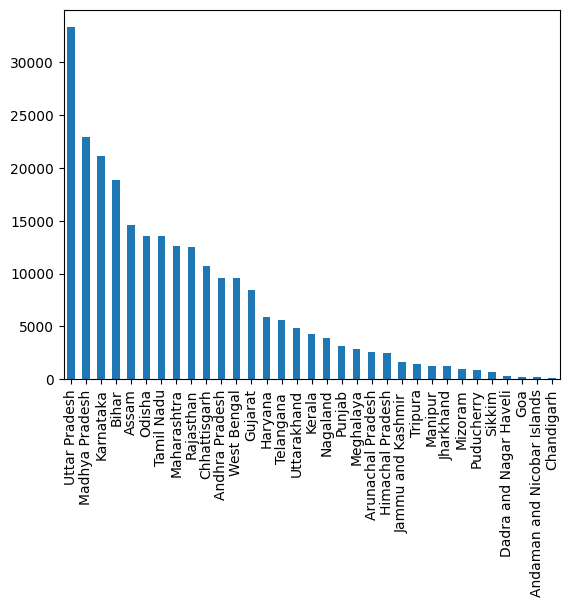

In [7]:
dataset.State_Name.value_counts().plot(kind = "bar")

Uttar Pradesh is producing more variety of crops.

### Visualizing the first 300 crop counts

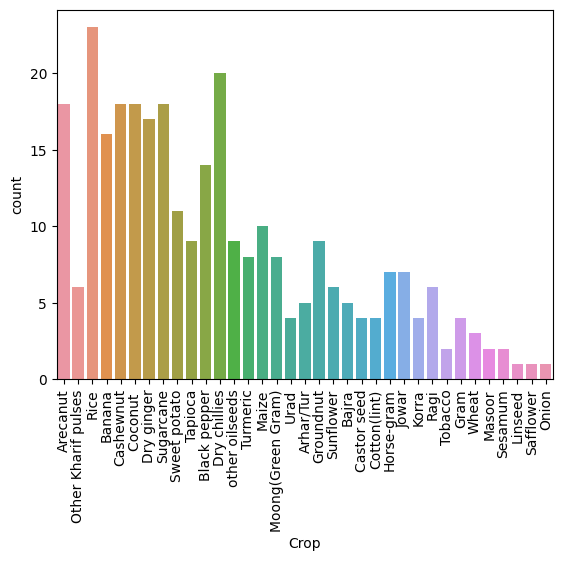

In [8]:
sns.countplot(data = dataset.head(300), x = 'Crop')

plt.xticks(rotation = 90)
plt.show()

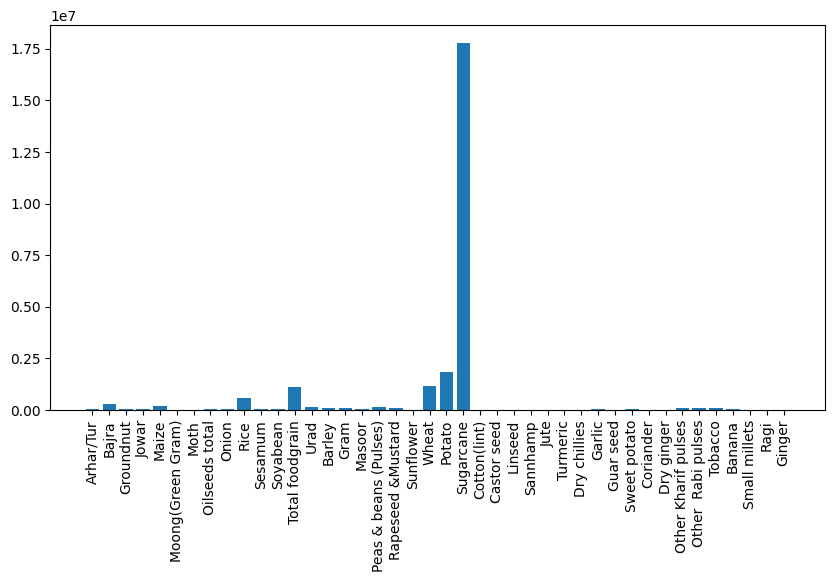

In [18]:
a= dataset[dataset.State_Name=="Uttar Pradesh"]
x= a.Crop
y= a.Production

fig = plt.figure(figsize = (10, 5))
 
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Among the variety of crops in Uttar Pradesh, Sugarcane have the highest production.

### Cultivation of crops through the years (1997-2015)

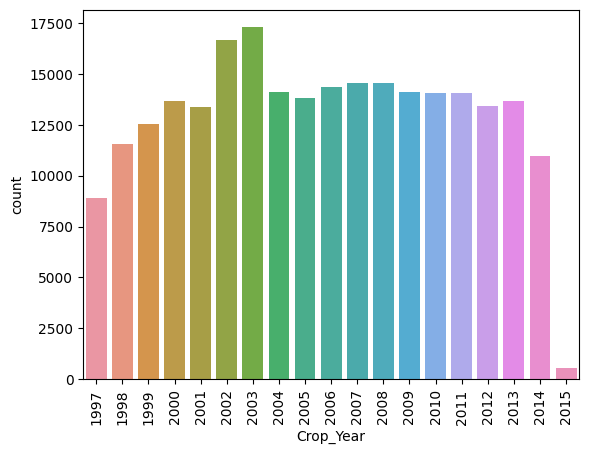

In [10]:
sns.countplot(data = dataset, x = "Crop_Year")

plt.xticks(rotation = 90)
plt.show()

2003 is the year with most variety of crops.

<Axes: xlabel='Crop_Year'>

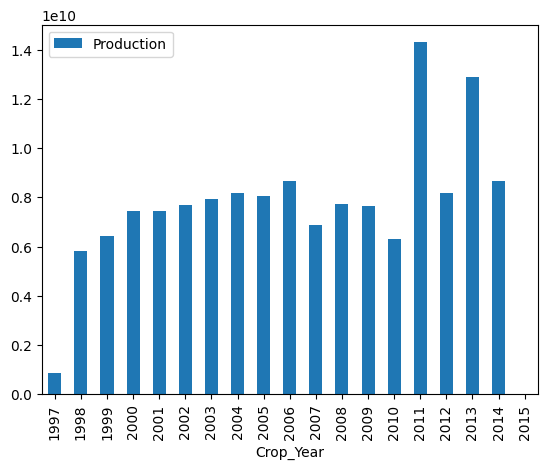

In [12]:
dataset.groupby(["Crop_Year"]).agg({"Production" : "sum"}).plot(kind = "bar")

2011 have the most production amount among all these years.

### Relationship of Production with Season

<Axes: xlabel='Season'>

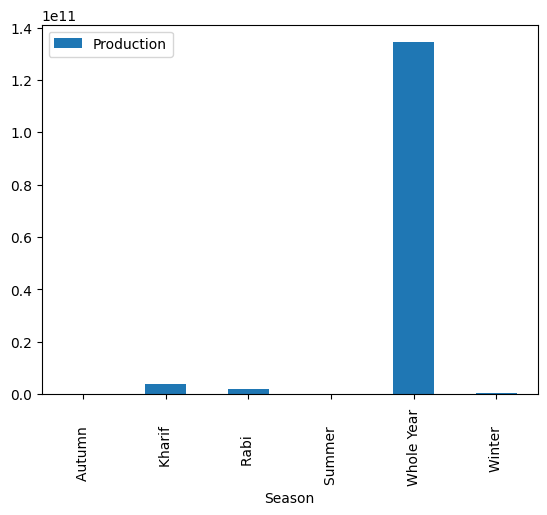

In [13]:
dataset.groupby(["Season"]).agg({"Production" : "sum"}).plot(kind = "bar")

Crops that are grown whole year have the highest production followed by Kharif crops.

### Relationship of Production with the Area of cultivation

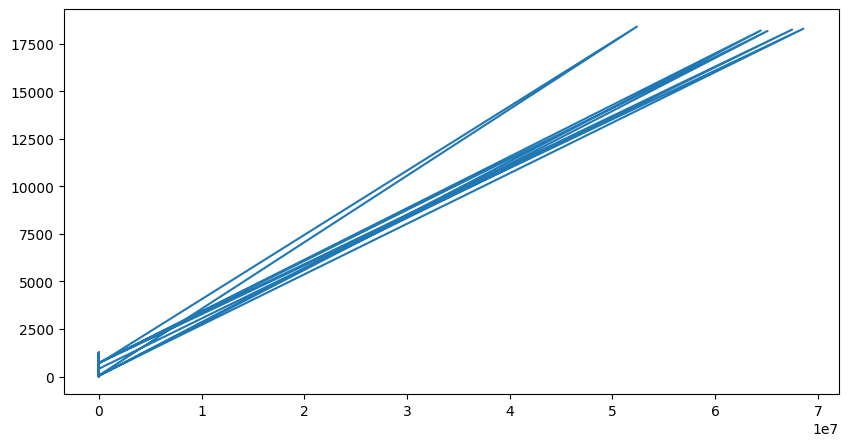

In [44]:
fig = plt.figure(figsize = (10, 5))
y= dataset.Area.head(50)
plt.plot(dataset.Production.head(50),y )
plt.show()

# Regression 

In [51]:
from sklearn.preprocessing import MinMaxScaler


In [52]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import r2_score

C:\Users\HP\AppData\Local\Temp\ipykernel_21360\4264227013.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = dataset.corr()


<Axes: >

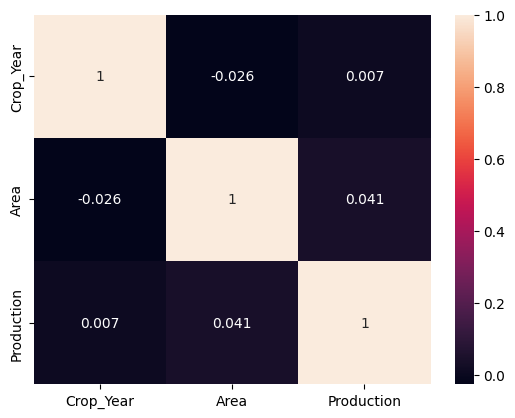

In [47]:
matrix = dataset.corr()
sns.heatmap(matrix, annot = True)

### Splitting X and y

In [49]:
y = dataset.Production
X = dataset.drop(['Production'], axis=1)

y

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 246091, dtype: float64

,State_Name,District_Name,Crop_Year,Season,Crop,Area
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0
...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0


### Splitting test and trainig set

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 90)

In [54]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(196872, 6)
(196872,)
(49219, 6)
(49219,)


### Splitting train-test dataset into numericals and categoricals for scaling and encoding

In [55]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [56]:
display(X_train_num.shape)
display(X_train_cat.shape)

display(X_test_num.shape)
display(X_test_cat.shape)

(196872, 2)

(196872, 4)

(49219, 2)

(49219, 4)

### Scaling train-test dataset using MinMaxscaler()

In [57]:
transform = MinMaxScaler().fit(X_train_num)

# scaling train-test dataset using same scaler

X_train_scaled = pd.DataFrame(transform.transform(X_train_num), columns = X_train_num.columns)
X_test_scaled = pd.DataFrame(transform.transform(X_test_num), columns = X_test_num.columns)

In [58]:
display(X_train_scaled.shape)
display(X_test_scaled.shape)

(196872, 2)

(49219, 2)

In [59]:
X_train_scaled.head()

,Crop_Year,Area
0,0.944444,8.452011e-03
1,0.444444,1.073232e-06
2,0.666667,5.223115e-03
3,0.055556,4.318092e-04
4,0.166667,3.517316e-07


In [60]:
X_test_scaled.head()

,Crop_Year,Area
0,0.611111,6.366342e-05
1,0.444444,3.336039e-05
2,0.111111,1.334686e-04
3,0.666667,3.950388e-03
4,0.055556,7.124820e-07
